<a href="https://colab.research.google.com/github/karinasaidene/DS_bootcamp_homework/blob/main/Batch_Normalizatio%2Cn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
from sklearn.model_selection import train_test_split 

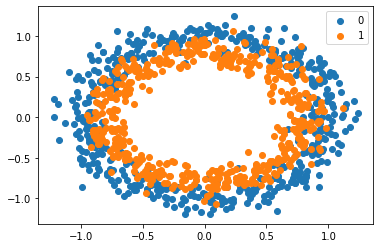

In [6]:
X , y = make_circles(n_samples=1000,noise=0.1,random_state=1)
for i in range (2) :
  samples_ix=where(y==i)
  pyplot.scatter(X[samples_ix,0],X[samples_ix,1],label=str(i))

pyplot.legend()
pyplot.show()


In [7]:
#split into train and test set 

X_train , X_test, y_train , y_test = train_test_split(X, y,test_size=0.1,random_state=1)

In [10]:
# a simple NN composed of two layers
model =tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='GlorotUniform'),
    tf.keras.layers.Dense(1,activation ='sigmoid'),
])

In [12]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
#train the model

history =model.fit(X_train , y_train ,validation_data=(X_test, y_test) ,epochs=100, verbose =0)

train  :  0.8544444441795349 test :  0.800000011920929


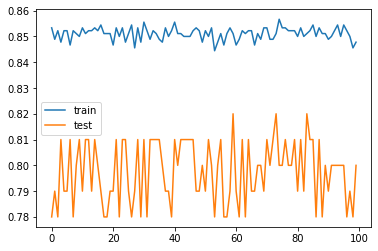

In [17]:
#evaluate the model 
_,trainacc= model.evaluate(X_train, y_train , verbose=0)
_,testacc = model.evaluate(X_test, y_test,verbose=0)

print("train  : ",trainacc, "test : ",testacc)
#plot the accuracy changes with a respect to the number of epochs
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [18]:
#same architecture with a bacth normalization layer
model =tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='GlorotUniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation ='sigmoid'),
])

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history =model.fit(X_train , y_train ,validation_data=(X_test, y_test) ,epochs=100, verbose =0)

train  :  0.851111114025116 test :  0.8299999833106995


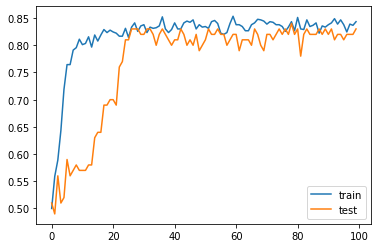

In [21]:
#evaluate the model 
_,trainacc= model.evaluate(X_train, y_train , verbose=0)
_,testacc = model.evaluate(X_test, y_test,verbose=0)

print("train  : ",trainacc, "test : ",testacc)
#plot the accuracy changes with a respect to the number of epochs
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()